### ***Конвертируем в Tensorflow Lite***

---

[Tensorflow Lite](https://www.tensorflow.org/api_docs/python/tf/lite/TFLiteConverter)

In [ ]:
# Импортируем библиотеку TensorFlow для работы с нейронными сетями
import tensorflow as tf
# импорт библиотеки TFLite
import tensorflow.lite as lite
# Последовательная модель НС
from tensorflow.keras.models import load_model
import os

from google.colab import drive, files                                           # подключем диск, # Загрузка файлов
import gdown                                                                    # Загрузка файлов из инета
import shutil

drive.mount('/content/drive')
drive_path = os.path.join('/content', 'drive')                                  # Путь к каталогу /content/drive

#pathBase = os.path.join(drive_path, 'MyDrive', 'Colab Notebooks', 'model_Conv2D.keras')
#shutil.copy('/content/model_Conv2D.keras', pathBase)

Mounted at /content/drive


In [ ]:
file_id = 'https://drive.google.com/uc?id=13rEVAy44cpEsNoapmG3G56tC5DD42Ptw'

gdown.download(file_id, '/content/ResNet Conv2D.ver-23.01.24.qipc-2000_errors-4.h5', quiet = True)

model = load_model('ResNet Conv2D.ver-23.01.24.qipc-2000_errors-4.h5')

In [ ]:
# @title show_size
def show_size(model_1, model_2):
  # Сохраняем файлы
  #model_1.save("model.keras")
  open("model.tflite", "wb").write(model_2)

  # Получаем размер в байтах
  #keras_size = os.path.getsize("model.keras")
  keras_size = os.path.getsize("ResNet Conv2D.ver-23.01.24.qipc-2000_errors-4.h5")
  tflite_size = os.path.getsize("model.tflite")

  #Конвертируем в мегабайты
  keras_size = round(keras_size/ 1e6, 1)
  tflite_size = round(tflite_size/ 1e6, 1)

  print(f"Keras: {keras_size} MB" )
  print(f"tfLITE: {tflite_size} MB")

In [ ]:
# Создаем конвертер на основе модели Keras
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Конвертируем модель в формат TensorFlow Lite
tflite_model = converter.convert()


# Выводим размер:
show_size(model, tflite_model)

Keras: 45.6 MB
tfLITE: 45.3 MB


In [ ]:
pathBase = os.path.join(drive_path, 'MyDrive', 'Colab Notebooks', 'final_stances_model.tflite')
shutil.copy('/content/model.tflite', pathBase)

'/content/drive/MyDrive/Colab Notebooks/final_stances_model.tflite'

In [ ]:
# Создаем конвертер на основе модели Keras
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Включаем оптимизации модели по умолчанию
# Это сделает модель более компактной и эффективной
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Конвертируем модель в формат TensorFlow Lite
tflite_model = converter.convert()

show_size(model, tflite_model)
pathBase = os.path.join(drive_path, 'MyDrive', 'Colab Notebooks', 'final_stances_model_opt.tflite')
shutil.copy('/content/model.tflite', pathBase)

Keras: 45.6 MB
tfLITE: 11.4 MB


'/content/drive/MyDrive/Colab Notebooks/final_stances_model_opt.tflite'

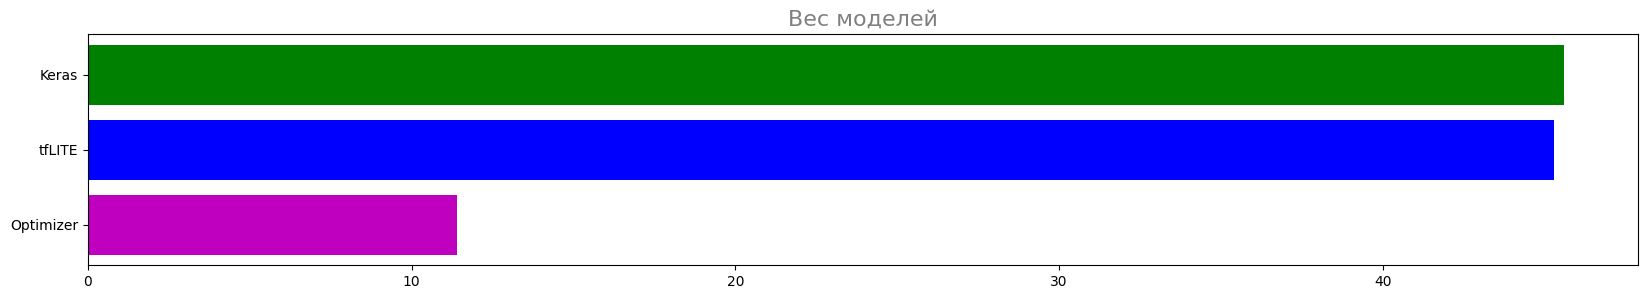

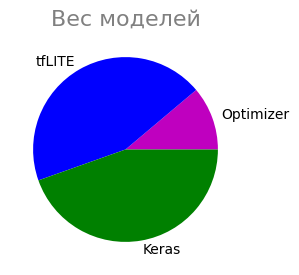

In [ ]:
# @title Визуализация
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))
x = ["Optimizer", "tfLITE", "Keras"]
y = [11.4, 45.3, 45.6]
colors = ['m', 'blue', 'green']

plt.barh(x, y, color=colors)
plt.title("Вес моделей", c='gray', fontsize=16)
plt.show()
plt.figure(figsize=(20, 3))
plt.pie(y, labels=x, colors=colors)
plt.title("Вес моделей", c='gray', fontsize=16)
plt.show()